In [6]:
# Basic Python utilities
import re
import time

# Data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display

# Natural Language Processing
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Scikit-learn preprocessing and pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Scikit-learn models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Scikit-learn metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score
)

In [14]:
# Reading the fake news data set
df_fake = pd.read_csv('/Users/uday.kemburu/Downloads/archive (3)/Fake.csv',
                 usecols=['title', 'text', 'subject', 'date', 'TRUE'],  # adjusted column names
                 low_memory=False)

# Display information about the loaded dataset
print("\nDataset Information:Fake News")
print("=" * 50)
print(f"Number of rows: {len(df_fake)}")
print(f"Number of columns: {len(df_fake.columns)}")
print("\nColumns in dataset:")
for col in df_fake.columns:
    print(f"- {col}: {df_fake[col].dtype}")

# Calculate text lengths
text_lengths = df_fake['text'].str.len()

# Calculate mean and median
mean_length = text_lengths.mean()
median_length = text_lengths.median()

print("\nText Length Statistics:")
print("=" * 50)
print(f"Mean text length: {mean_length:.2f} characters")
print(f"Median text length: {median_length:.2f} characters")

# Display first few rows
print("\nFirst few rows of the dataset:")
print("=" * 50)
display(df_fake.head())


Dataset Information:Fake News
Number of rows: 23502
Number of columns: 5

Columns in dataset:
- title: object
- text: object
- subject: object
- date: object
- TRUE: object

Text Length Statistics:
Mean text length: 2537.06 characters
Median text length: 2165.00 characters

First few rows of the dataset:


,title,text,subject,date,TRUE
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,No
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,No
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,No
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,No
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,No


In [16]:
# reading the real news data set
df_real = pd.read_csv('/Users/uday.kemburu/Downloads/archive (3)/True.csv',
                 usecols=['title', 'text', 'subject', 'date', 'TRUE'],  
                 low_memory=False)

# Display information about the loaded dataset
print("\nDataset Information:Real News")
print("=" * 50)
print(f"Number of rows: {len(df_real)}")
print(f"Number of columns: {len(df_real.columns)}")
print("\nColumns in dataset:")
for col in df_real.columns:
    print(f"- {col}: {df_real[col].dtype}")

# Calculate text lengths
text_lengths = df_real['text'].str.len()

# Calculate mean and median
mean_length = text_lengths.mean()
median_length = text_lengths.median()

print("\nText Length Statistics:")
print("=" * 50)
print(f"Mean text length: {mean_length:.2f} characters")
print(f"Median text length: {median_length:.2f} characters")

# Display first few rows
print("\nFirst few rows of the dataset:")
print("=" * 50)
display(df_real.head())


Dataset Information:Real News
Number of rows: 21417
Number of columns: 5

Columns in dataset:
- title: object
- text: object
- subject: object
- date: object
- TRUE: object

Text Length Statistics:
Mean text length: 2383.28 characters
Median text length: 2222.00 characters

First few rows of the dataset:


,title,text,subject,date,TRUE
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,Yes
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,Yes
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,Yes
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,Yes
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,Yes


In [20]:
# Merge the realnews dataset and fakenews dataset into one dataset
df_combined = pd.concat([df_fake, df_real], axis=0, ignore_index=True)

# Shuffle the dataset to mix fake and real news
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Display information about the combined dataset
print("\nCombined Dataset Info:")
print("=" * 50)
print(f"Total number of rows: {len(df_combined)}")
print(f"Number of columns: {len(df_combined.columns)}")
print("\nColumns in dataset:", df_combined.columns.tolist())
print("\nDistribution of TRUE/FALSE news:")
print(df_combined['TRUE'].value_counts())
print("\nPercentage distribution:")
print(df_combined['TRUE'].value_counts(normalize=True) * 100)

# Check for any missing values
print("\nMissing values in combined dataset:")
print("=" * 50)
print(df_combined.isnull().sum())

# Display sample of final dataset
print("\nSample of combined dataset:")
print("=" * 50)
display(df_combined.head())


Combined Dataset Info:
Total number of rows: 44919
Number of columns: 5

Columns in dataset: ['title', 'text', 'subject', 'date', 'TRUE']

Distribution of TRUE/FALSE news:
TRUE
No     23502
Yes    21417
Name: count, dtype: int64

Percentage distribution:
TRUE
No     52.320844
Yes    47.679156
Name: proportion, dtype: float64

Missing values in combined dataset:
title       0
text        0
subject    21
date       21
TRUE        0
dtype: int64

Sample of combined dataset:


,title,text,subject,date,TRUE
0,Porous Texas border fence foreshadows challeng...,"BROWNSVILLE, Texas (Reuters) - The rust-colore...",politicsNews,2-Dec-16,Yes
1,Trade in focus at hearing for Trump's nominee ...,WASHINGTON (Reuters) - U.S. senators stressed ...,worldnews,3-Oct-17,Yes
2,‘American Sniper’ Widow Gets Set Straight Aft...,"Taya Kyle, the widow of infamous American Sni...",News,8-Jan-16,No
3,Woman Gets Death Threats Just For Posting A P...,"After last week s election, Hillary supporters...",News,15-Nov-16,No
4,PNG says Australia responsible for hundreds of...,SYDNEY (Reuters) - Australia will not be allow...,worldnews,30-Oct-17,Yes


In [51]:
# Baseline LogisticRegression with TfidfVectorizer
# Prepare features and target
X = df_combined['text']  # Using only the text content for prediction
y = df_combined['TRUE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

# Create a pipeline for text processing and classification
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('clf', LogisticRegression(random_state=42))
])

# Measure training time
start_time = time.time()
text_clf.fit(X_train, y_train)
train_time = time.time() - start_time

# Measure prediction times
start_time = time.time()
y_pred_train = text_clf.predict(X_train)
train_pred_time = time.time() - start_time

start_time = time.time()
y_pred_test = text_clf.predict(X_test)
test_pred_time = time.time() - start_time

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Create performance DataFrame
results_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 
              'Test Accuracy', 
              'Training Time (seconds)', 
              'Train Prediction Time (seconds)', 
              'Test Prediction Time (seconds)'],
    'Score': [f"{train_accuracy:.4f}", 
              f"{test_accuracy:.4f}",
              f"{train_time:.2f}",
              f"{train_pred_time:.2f}",
              f"{test_pred_time:.2f}"]
})

# Display results
print("\nLogisticRegression Model Performance Metrics:")
print("=" * 50)
print(results_df.to_string(index=False))


LogisticRegression Model Performance Metrics:
                         Metric  Score
                 Train Accuracy 0.9898
                  Test Accuracy 0.9865
        Training Time (seconds)   4.57
Train Prediction Time (seconds)   3.98
 Test Prediction Time (seconds)   1.71


Training SVM model...

SVM Model Performance Metrics:
                         Metric  Score
                 Train Accuracy 0.9967
                  Test Accuracy 0.9921
        Training Time (seconds) 139.05
Train Prediction Time (seconds)  72.82
 Test Prediction Time (seconds)  31.03


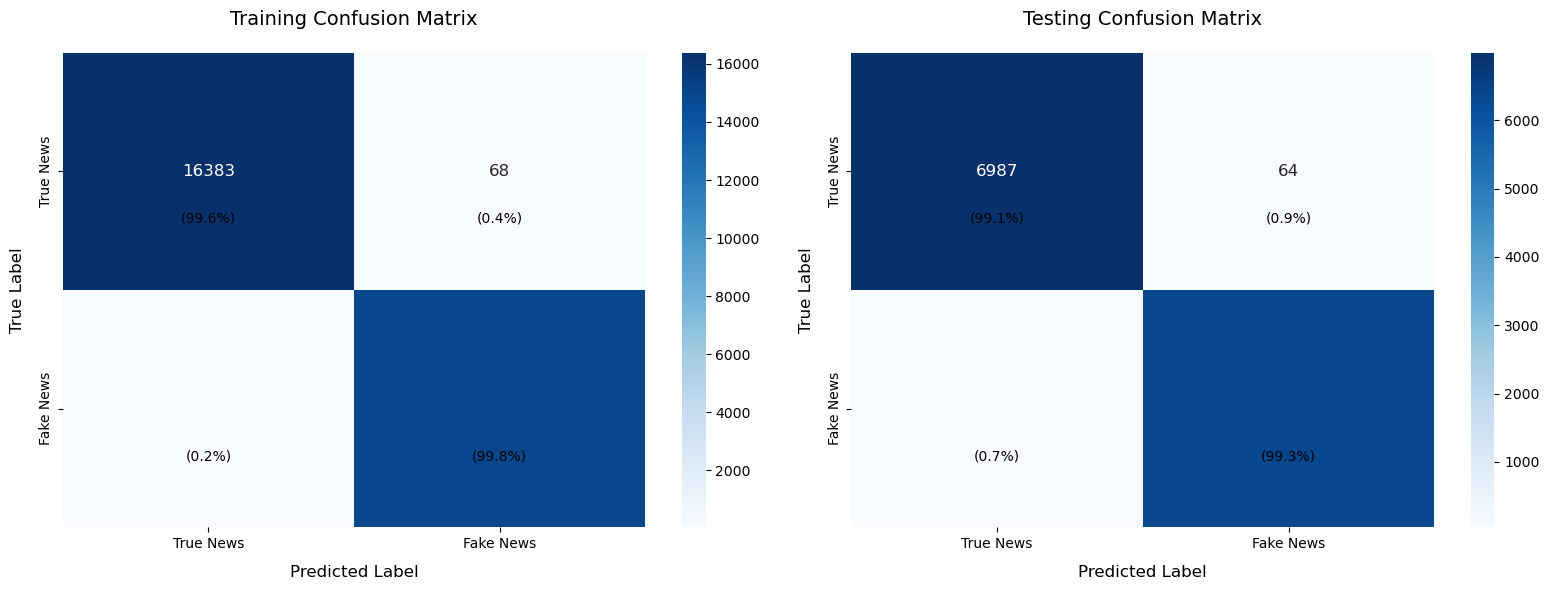

In [35]:
# Baseline SVM with TfidfVectorizer
# Prepare features and target
X = df_combined['text']  # Using only the text content for prediction
y = df_combined['TRUE']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    stratify=y)

# Create a pipeline for text processing and SVM classification
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('clf', SVC(kernel='linear', random_state=42))  # Using linear kernel for text classification
])

# Record start time
start_time = time.time()

# Fit the model
print("Training SVM model...")
svm_pipeline.fit(X_train, y_train)

# Record training time
training_time = time.time() - start_time

# Measure prediction times
start_time = time.time()
y_pred_train = svm_pipeline.predict(X_train)
train_pred_time = time.time() - start_time

start_time = time.time()
y_pred_test = svm_pipeline.predict(X_test)
test_pred_time = time.time() - start_time

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Create performance DataFrame
results_df = pd.DataFrame({
    'Metric': ['Train Accuracy', 
               'Test Accuracy', 
               'Training Time (seconds)',
               'Train Prediction Time (seconds)',
               'Test Prediction Time (seconds)'],
    'Score': [f"{train_accuracy:.4f}", 
              f"{test_accuracy:.4f}",
              f"{training_time:.2f}",
              f"{train_pred_time:.2f}",
              f"{test_pred_time:.2f}"]
})

# Display results
print("\nSVM Model Performance Metrics:")
print("=" * 50)
print(results_df.to_string(index=False))

# Get confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Define class labels
class_labels = ['True News', 'Fake News']

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Training confusion matrix
sns.heatmap(cm_train, annot=True, fmt='d', ax=ax1, cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels,
            annot_kws={"size": 12})
ax1.set_title('Training Confusion Matrix', pad=20, size=14)
ax1.set_xlabel('Predicted Label', size=12, labelpad=10)
ax1.set_ylabel('True Label', size=12, labelpad=10)

# Add value percentages for training
for i in range(2):
    for j in range(2):
        percentage = cm_train[i, j] / cm_train[i].sum() * 100
        ax1.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
                ha='center', va='center', size=10)

# Testing confusion matrix
sns.heatmap(cm_test, annot=True, fmt='d', ax=ax2, cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels,
            annot_kws={"size": 12})
ax2.set_title('Testing Confusion Matrix', pad=20, size=14)
ax2.set_xlabel('Predicted Label', size=12, labelpad=10)
ax2.set_ylabel('True Label', size=12, labelpad=10)

# Add value percentages for testing
for i in range(2):
    for j in range(2):
        percentage = cm_test[i, j] / cm_test[i].sum() * 100
        ax2.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
                ha='center', va='center', size=10)

plt.tight_layout()
plt.show()




Top Words Indicating Fake News (Negative Coefficients):


,word,coefficient,abs_coef
2190,image,-8.617643,8.617643
2450,just,-6.566342,6.566342
1357,don,-5.575731,5.575731
1923,gop,-5.457101,5.457101
1258,didn,-5.252257,5.252257
3047,obama,-5.080180,5.080180
1350,doesn,-4.957732,4.957732
4925,wire,-4.889377,4.889377
2089,hillary,-4.747593,4.747593
2921,mr,-4.699628,4.699628



Top Words Indicating Real News (Positive Coefficients):


,word,coefficient,abs_coef
3797,reuters,31.386489,31.386489
3934,say,17.245296,17.245296
4858,washington,6.680354,6.680354
4881,wednesday,6.102411,6.102411
4643,tuesday,5.845958,5.845958
4531,thursday,5.391726,5.391726
1839,friday,5.191010,5.191010
2887,monday,4.885072,4.885072
1362,dont,4.838347,4.838347
3033,nov,4.593966,4.593966


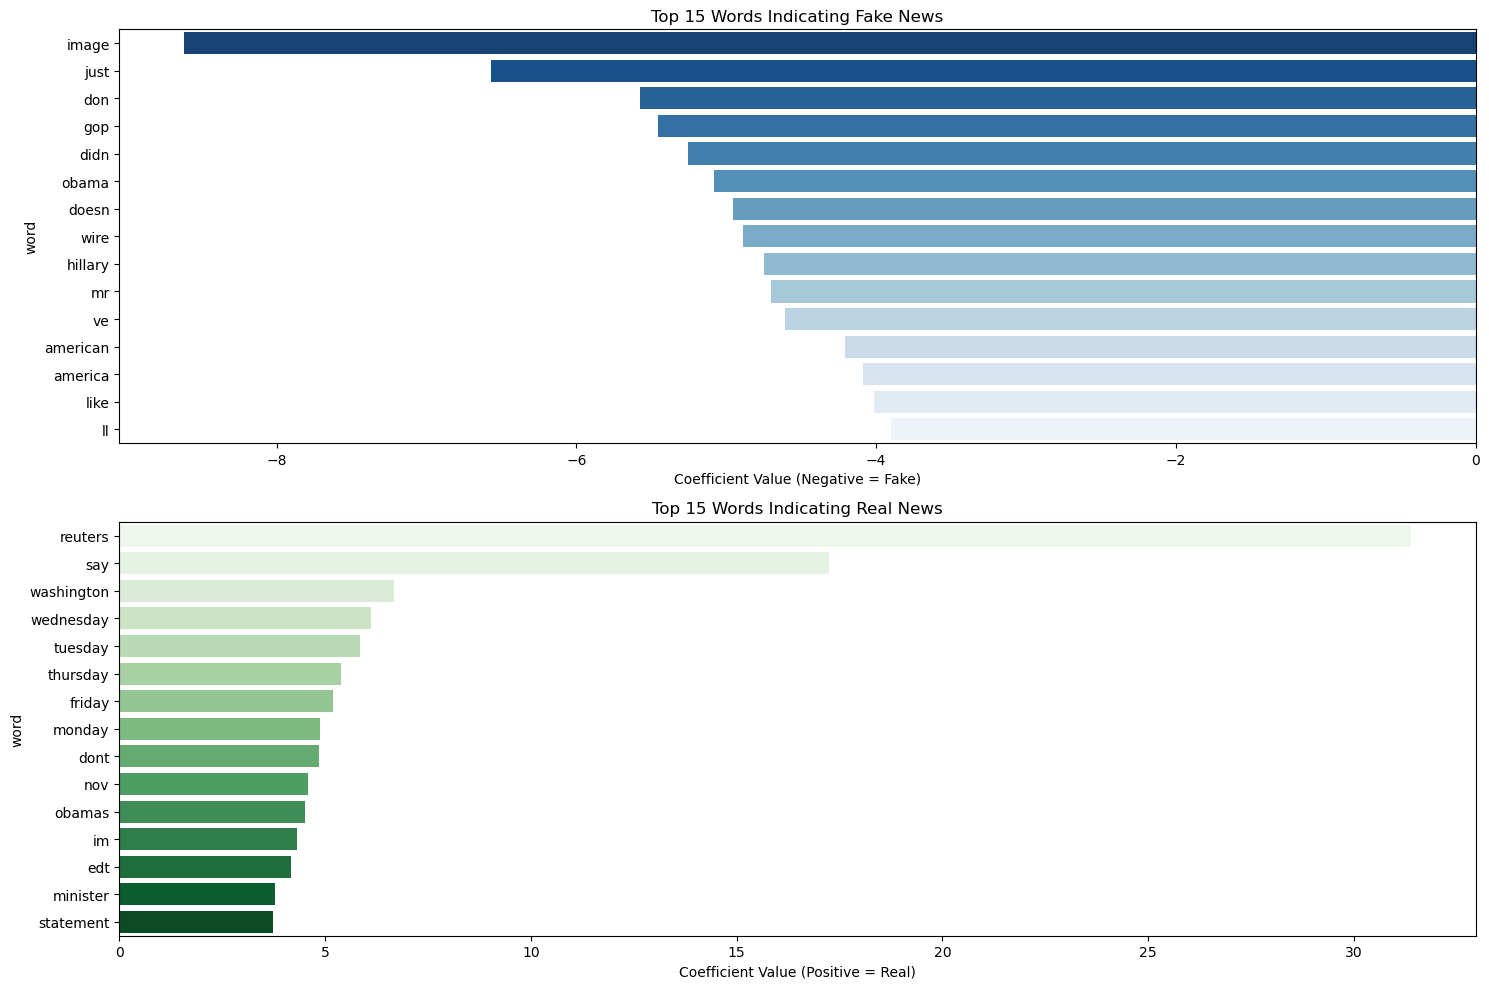

In [49]:
# word importance
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create and fit TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_tfidf, y)

# Get coefficients for each word
coefficients = lr_model.coef_[0]

# Create DataFrame with words and their coefficients
word_importance_df = pd.DataFrame({
    'word': feature_names,
    'coefficient': coefficients
})

# Sort by absolute coefficient value
word_importance_df['abs_coef'] = abs(word_importance_df['coefficient'])
word_importance_df = word_importance_df.sort_values('abs_coef', ascending=False)

# Display top words indicating fake and real news
print("\nTop Words Indicating Fake News (Negative Coefficients):")
print("=" * 50)
display(word_importance_df[word_importance_df['coefficient'] < 0].head(10))

print("\nTop Words Indicating Real News (Positive Coefficients):")
print("=" * 50)
display(word_importance_df[word_importance_df['coefficient'] > 0].head(10))

# Create visualizations
plt.figure(figsize=(15, 10))

# Plot for fake news indicators
plt.subplot(2, 1, 1)
sns.barplot(x='coefficient', 
            y='word',
            data=word_importance_df[word_importance_df['coefficient'] < 0].head(15),
            palette='Blues_r')
plt.title('Top 15 Words Indicating Fake News')
plt.xlabel('Coefficient Value (Negative = Fake)')

# Plot for real news indicators
plt.subplot(2, 1, 2)
sns.barplot(x='coefficient', 
            y='word',
            data=word_importance_df[word_importance_df['coefficient'] > 0].head(15),
            palette='Greens')
plt.title('Top 15 Words Indicating Real News')
plt.xlabel('Coefficient Value (Positive = Real)')

plt.tight_layout()
plt.show()




Performing GridSearchCV for SVM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Performing GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


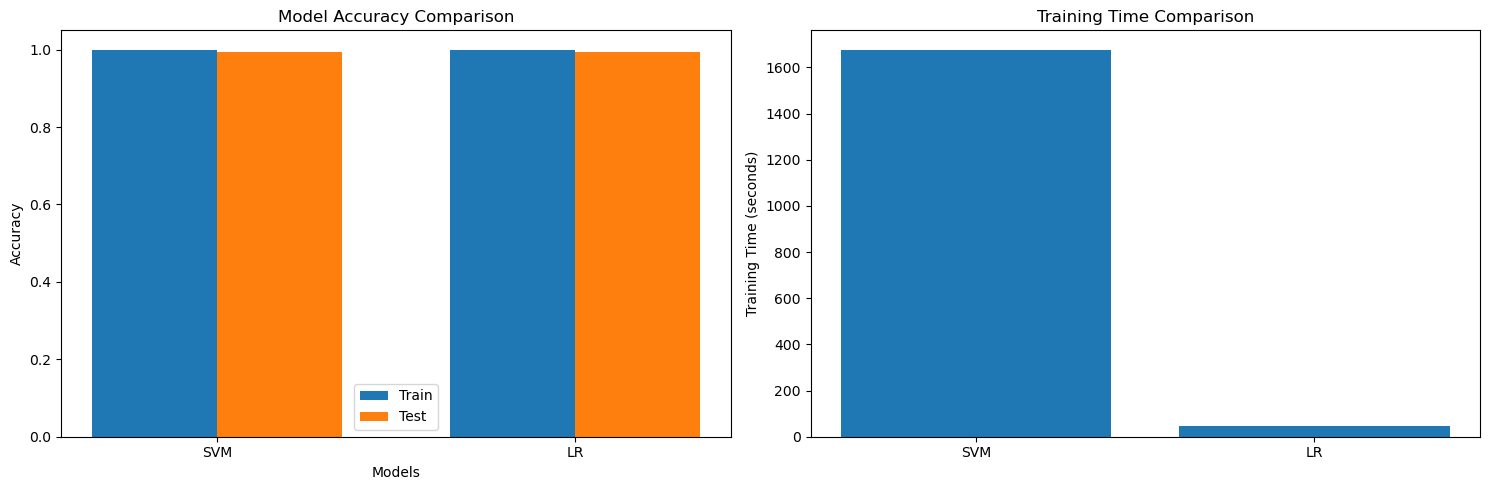


Detailed Results for SVM:
Best Parameters: {'classifier__C': 1, 'classifier__kernel': 'rbf'}
Best CV Score: 0.9910
Train Accuracy: 0.9992
Test Accuracy: 0.9927
Training Time: 1676.59 seconds

Detailed Results for Logistic Regression:
Best Parameters: {'classifier__C': 100, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best CV Score: 0.9924
Train Accuracy: 1.0000
Test Accuracy: 0.9932
Training Time: 44.59 seconds


In [39]:
# SVM and Logistic Regression with hyper parameters
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import time

def perform_grid_search(model, param_grid, model_name):
    """
    Perform grid search with cross-validation
    """
    # Create pipeline
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
        ('classifier', model)
    ])
    
    # Modify param grid to include pipeline step name
    modified_param_grid = {}
    for key, value in param_grid.items():
        modified_param_grid[f'classifier__{key}'] = value
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid=modified_param_grid,
        cv=5,
        n_jobs=-1,
        verbose=1,
        scoring='accuracy',
        return_train_score=True
    )
    
    # Record start time
    start_time = time.time()
    
    # Fit the model
    print(f"\nPerforming GridSearchCV for {model_name}...")
    grid_search.fit(X_train, y_train)
    
    # Record end time
    training_time = time.time() - start_time
    
    # Make predictions
    train_accuracy = grid_search.score(X_train, y_train)
    test_accuracy = grid_search.score(X_test, y_test)
    
    # Create results dictionary
    results = {
        'model_name': model_name,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'training_time': training_time,
        'cv_results': pd.DataFrame(grid_search.cv_results_)
    }
    
    return results

# Define parameters
param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf']
}

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

# Perform grid search for both models
svm_results = perform_grid_search(
    SVC(random_state=42),
    param_grid_svm,
    "SVM"
)

lr_results = perform_grid_search(
    LogisticRegression(random_state=42),
    param_grid_lr,
    "Logistic Regression"
)

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': [svm_results['model_name'], lr_results['model_name']],
    'Best Parameters': [str(svm_results['best_params']), 
                       str(lr_results['best_params'])],
    'Best CV Score': [f"{svm_results['best_score']:.4f}", 
                     f"{lr_results['best_score']:.4f}"],
    'Train Accuracy': [f"{svm_results['train_accuracy']:.4f}", 
                      f"{lr_results['train_accuracy']:.4f}"],
    'Test Accuracy': [f"{svm_results['test_accuracy']:.4f}", 
                     f"{lr_results['test_accuracy']:.4f}"],
    'Training Time (s)': [f"{svm_results['training_time']:.2f}", 
                         f"{lr_results['training_time']:.2f}"]
})



# Visualize results
plt.figure(figsize=(15, 5))

# Plot 1: Accuracy Comparison
plt.subplot(1, 2, 1)
x = np.arange(2)
width = 0.35

plt.bar(x - width/2, 
        [svm_results['train_accuracy'], lr_results['train_accuracy']], 
        width, label='Train')
plt.bar(x + width/2, 
        [svm_results['test_accuracy'], lr_results['test_accuracy']], 
        width, label='Test')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x, ['SVM', 'LR'])
plt.legend()

# Plot 2: Training Time Comparison
plt.subplot(1, 2, 2)
plt.bar(['SVM', 'LR'], 
        [svm_results['training_time'], lr_results['training_time']])
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')

plt.tight_layout()
plt.show()

# Print detailed analysis
def print_detailed_results(results):
    print(f"\nDetailed Results for {results['model_name']}:")
    print("=" * 50)
    print(f"Best Parameters: {results['best_params']}")
    print(f"Best CV Score: {results['best_score']:.4f}")
    print(f"Train Accuracy: {results['train_accuracy']:.4f}")
    print(f"Test Accuracy: {results['test_accuracy']:.4f}")
    print(f"Training Time: {results['training_time']:.2f} seconds")
    
    

# Print detailed analysis for both models
print_detailed_results(svm_results)
print_detailed_results(lr_results)

In [2]:
# lemmatizing and TfidfVectorizer

In [47]:


# lemmatizing and TfidfVectorizer
import nltk
# Download required NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def preprocess_text(text):
    """Clean text by removing special characters and converting to lowercase"""
    text = str(text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

def lemmatize_text(text):
    """Lemmatize text while considering POS tags"""
    lemmatizer = WordNetLemmatizer()
    text = preprocess_text(text)
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return ' '.join(lemmatized_words)

# Set pandas display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Lemmatize the text
print("Lemmatizing text data...")
start_time = time.time()
df_lemmatized = df_combined.copy()
df_lemmatized['lemmatized_text'] = df_combined['text'].apply(lemmatize_text)
lemmatization_time = time.time() - start_time
print(f"Lemmatization completed in {lemmatization_time:.2f} seconds")

# Split the data
X = df_lemmatized['lemmatized_text']
y = df_lemmatized['TRUE']  # replace 'label' with your target column name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the pipelines with TfidfVectorizer
pipelines = {
    'Logistic': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('classifier', LogisticRegression(max_iter=1000))  # Increased max_iter
    ]),
    
    'Decision Tree': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('classifier', DecisionTreeClassifier())
    ]),
    
    'Bayes': Pipeline([
        ('tfidf', TfidfVectorizer(stop_words='english')),
        ('classifier', MultinomialNB())
    ])
}

# Define parameter grids with adjusted parameters
param_grids = {
    'Logistic': {
        'tfidf__max_features': [1000, 2000],
        'tfidf__min_df': [2],
        'tfidf__max_df': [0.9],
        'tfidf__ngram_range': [(1, 1)],
        'classifier__C': [0.01, 0.1, 1.0],  
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs', 'newton-cg']  
    },
    
    'Decision Tree': {
        'tfidf__max_features': [1000, 2000],
        'tfidf__min_df': [2],
        'tfidf__max_df': [0.9],
        'tfidf__ngram_range': [(1, 1)],
        'classifier__max_depth': [3, 5, 7, 10],  # Specific max_depth values
        'classifier__min_samples_split': [5, 10],
        'classifier__min_samples_leaf': [2, 4]
    },
    
    'Bayes': {
        'tfidf__max_features': [1000, 2000],
        'tfidf__min_df': [2],
        'tfidf__max_df': [0.9],
        'tfidf__ngram_range': [(1, 1)],
        'classifier__alpha': [0.1, 0.5, 1.0]
    }
}

# Dictionary to store results
results = {}

# Perform GridSearchCV for each pipeline
for name, pipeline in pipelines.items():
    print(f"\nTuning {name}...")
    
    # Record start time
    start_time = time.time()
    
    grid_search = GridSearchCV(
        pipeline,
        param_grids[name],
        cv=5,
        n_jobs=-1,
        scoring='accuracy',
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    # Record training time
    training_time = time.time() - start_time
    
    results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'training_time': training_time
    }

# Print best parameters
print("\nBest Parameters for each model:")
print("=" * 50)
for model in ['Logistic', 'Decision Tree', 'Bayes']:
    print(f"\n{model}:")
    for param, value in results[model]['best_params'].items():
        print(f"    {param}: {value}")

# Create simplified results DataFrame
results_df = pd.DataFrame({
    'Model': ['Logistic', 'Decision Tree', 'Bayes'],
    'Best Score': [results[model]['best_score'] for model in ['Logistic', 'Decision Tree', 'Bayes']],
    'Training Time (seconds)': [results[model]['training_time'] for model in ['Logistic', 'Decision Tree', 'Bayes']]
})

# Set Model as index and format the scores
results_df.set_index('Model', inplace=True)
results_df['Best Score'] = results_df['Best Score'].apply(lambda x: f"{x:.4f}")
results_df['Training Time (seconds)'] = results_df['Training Time (seconds)'].apply(lambda x: f"{x:.2f}")

print("\nResults Summary:")
print("=" * 50)
print(results_df)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/uday.kemburu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/uday.kemburu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/uday.kemburu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/uday.kemburu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Lemmatizing text data...
Lemmatization completed in 672.52 seconds

Tuning Logistic...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Tuning Decision Tree...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Tuning Bayes...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best Parameters for each model:

Logistic:
    classifier__C: 1.0
    classifier__penalty: l2
    classifier__solver: lbfgs
    tfidf__max_df: 0.9
    tfidf__max_features: 2000
    tfidf__min_df: 2
    tfidf__ngram_range: (1, 1)

Decision Tree:
    classifier__max_depth: 3
    classifier__min_samples_leaf: 2
    classifier__min_samples_split: 10
    tfidf__max_df: 0.9
    tfidf__max_features: 2000
    tfidf__min_df: 2
    tfidf__ngram_range: (1, 1)

Bayes:
    classifier__alpha: 0.1
    tfidf__max_df: 0.9
    tfidf__max_features: 2000
    tfidf__min_df: 2
    tfidf__ngram_range: (1, 1)

Results Summary:
              Best Score Training Time (seconds)
Model                      